In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = os.getcwd()

os.chdir(base_dir)

In [3]:
print("=" * 150)
print("STEP 1: MENDEFINISIKAN PERTANYAAN")

print("""
Pertanyaan:
    1. Stasiun mana di Beijing China yang memiliki tingkat PM2.5 dan PM10 yang terendah dalam rentang 2013 hingga 2017?
    2. Di antara gas SO2, NO2, CO, dan O3, manakah yang memiliki hubungan korelasi paling kuat terhadap PM2.5 dan PM10 pada stasiun di Beijing China
       dan bagaimanakah hubungannya?
    3. Apakah ada hubungan antara parameter udara seperti temperatur udara, tekanan udara, suhu titik embun, curah hujan, dan kecepatan angin terhadap
       PM2.5 dan PM10 pada stasiun di Beijing China?
""")
print("=" * 150)

STEP 1: MENDEFINISIKAN PERTANYAAN

Pertanyaan:
    1. Stasiun mana di Beijing China yang memiliki tingkat PM2.5 dan PM10 yang terendah dalam rentang 2013 hingga 2017?
    2. Di antara gas SO2, NO2, CO, dan O3, manakah yang memiliki hubungan korelasi paling kuat terhadap PM2.5 dan PM10 pada stasiun di Beijing China
       dan bagaimanakah hubungannya?
    3. Apakah ada hubungan antara parameter udara seperti temperatur udara, tekanan udara, suhu titik embun, curah hujan, dan kecepatan angin terhadap
       PM2.5 dan PM10 pada stasiun di Beijing China?



In [4]:
print("=" * 150)
print("STEP 2: PROSES PENGUMPULAN DATA DAN PENGGABUNGAN DATA")
print("=" * 150)

STEP 2: PROSES PENGUMPULAN DATA DAN PENGGABUNGAN DATA


In [5]:
folder_data = os.path.join(base_dir, "dataset_air_quality")

kumpulan_data = {}
for file_name in os.listdir(folder_data):
    file_path = os.path.join(folder_data, file_name)
    if os.path.isfile(file_path) and file_name.endswith(".csv"):
        df = pd.read_csv(file_path)
        kumpulan_data[file_name] = df
        print(f"Berhasil membaca {file_name}")

for name, df in kumpulan_data.items():
    print(f"\n{name}:\n")
    print(df.head(), end= "\n<--------------------------------------------------------------------------------------------------------------->")

Berhasil membaca Aotizhongxin.csv
Berhasil membaca Changping.csv
Berhasil membaca Dingling.csv
Berhasil membaca Dongsi.csv
Berhasil membaca Guanyuan.csv
Berhasil membaca Gucheng.csv
Berhasil membaca Huairou.csv
Berhasil membaca Nongzhanguan.csv
Berhasil membaca Shunyi.csv
Berhasil membaca Tiantan.csv
Berhasil membaca Wanliu.csv
Berhasil membaca Wanshouxigong.csv

Aotizhongxin.csv:

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  10

In [6]:
data_gabungan = pd.concat(kumpulan_data.values(), ignore_index=True)
data_gabungan["No"] = range(1, len(data_gabungan) + 1)

data_gabungan.to_csv("data_gabungan.csv", index=False)

data_gabungan.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [7]:
print("=" * 150)
print("STEP 3: EKSPLORASI DATA AWAL")
print("=" * 150)

STEP 3: EKSPLORASI DATA AWAL


In [8]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [9]:
print("=" * 150)
print("STEP 4: DATA WRANGLING")
print("=" * 150)

STEP 4: DATA WRANGLING


In [10]:
data_gabungan['PM2.5'] = data_gabungan['PM2.5'].fillna(data_gabungan['PM2.5'].median())
data_gabungan['PM10'] = data_gabungan['PM10'].fillna(data_gabungan['PM10'].median())
data_gabungan['SO2'] = data_gabungan['SO2'].fillna(data_gabungan['SO2'].median())
data_gabungan['NO2'] = data_gabungan['NO2'].fillna(value=data_gabungan['NO2'].median())
data_gabungan['CO'] = data_gabungan['CO'].fillna(value=data_gabungan['CO'].median())
data_gabungan['O3'] = data_gabungan['O3'].fillna(value=data_gabungan['O3'].median())
data_gabungan['RAIN'] = data_gabungan['RAIN'].fillna(value=data_gabungan['RAIN'].median())
data_gabungan['WSPM'] = data_gabungan['WSPM'].fillna(value=data_gabungan['WSPM'].median())

data_gabungan['TEMP'] = data_gabungan['TEMP'].interpolate(method='linear')
data_gabungan['PRES'] = data_gabungan['PRES'].interpolate(method='linear')
data_gabungan['DEWP'] = data_gabungan['DEWP'].interpolate(method='linear')

data_gabungan['wd'] = data_gabungan['wd'].fillna(value="tidak ada angin")

In [11]:
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [12]:
data_gabungan.duplicated().sum()

0

In [13]:
data_gabungan.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,210384.50000,2014.662560,6.522930,15.729637,11.500000,79.278489,104.256193,15.641507,50.418633,1214.493362,56.981874,13.531692,1010.753337,2.482421,0.064416,1.729461
std,121465.40337,1.177198,3.448707,8.800102,6.922195,80.056799,91.108745,21.455419,34.642023,1133.542988,55.802413,11.437867,10.474302,13.797675,0.820626,1.245947
min,1.00000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,105192.75000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,210384.50000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,315576.25000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,420768.00000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [14]:
print("=" * 150)
print("STEP 5:EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION")
print("=" * 150)

STEP 5:EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION


In [15]:
data_gabungan['tanggal_waktu'] = pd.to_datetime(data_gabungan[['day', 'month', 'year', 'hour']])

data_gabungan['tanggal_waktu'] = data_gabungan['tanggal_waktu'].dt.strftime('%d %B %Y')

data_gabungan.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,tanggal_waktu
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,01 March 2013
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,01 March 2013
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,01 March 2013
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,01 March 2013
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,01 March 2013
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,01 March 2013
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,01 March 2013
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,01 March 2013
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,01 March 2013
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin,01 March 2013


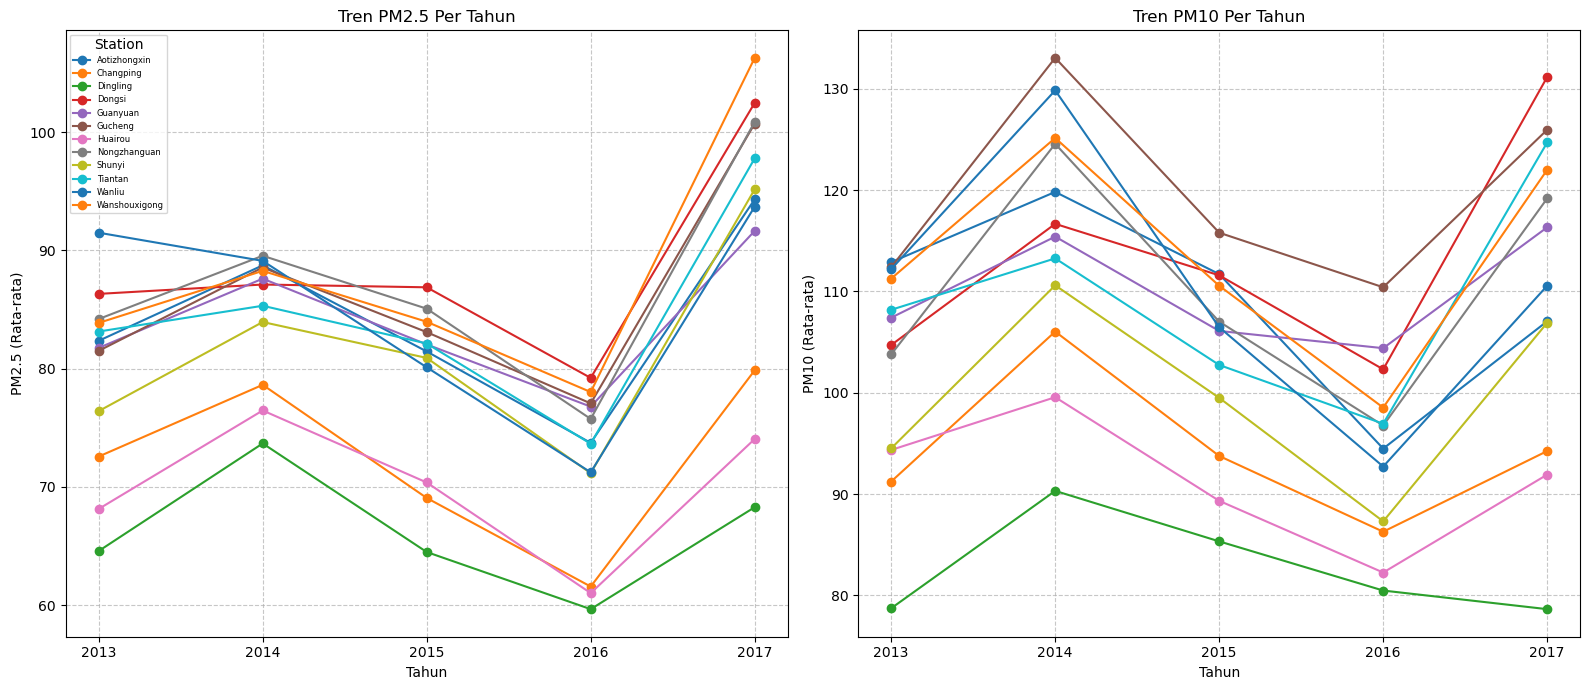

In [16]:
data_per_tahun = data_gabungan.groupby(["year", "station"]).mean(numeric_only=True).reset_index()

kualitas_udara = ["PM2.5", "PM10"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
axes = axes.flatten()

for i, column in enumerate(kualitas_udara):
    ax = axes[i]
    for station in data_per_tahun["station"].unique():
        station_data = data_per_tahun[data_per_tahun["station"] == station]
        ax.plot(station_data["year"], station_data[column], marker="o", label=station)
    
    ax.set_title(f"Tren {column} Per Tahun", fontsize=12)
    ax.set_xlabel("Tahun", fontsize=10)
    ax.set_ylabel(f"{column} (Rata-rata)", fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.set_xticks(data_per_tahun["year"].unique().astype(int))

    if i == 0:
        ax.legend(title="Station", loc="upper left", fontsize=6)

plt.tight_layout()
plt.savefig("kualitas_udara.png", dpi=300)
plt.show()

In [17]:
print("=" * 150)
print("""
Berdasarkan data diatas, stasiun Dingling memiliki kadar PM2.5 dan PM10 yang paling rendah di antara stasiun stasiun lainnya di Beijing
""")
print("=" * 150)


Berdasarkan data diatas, stasiun Dingling memiliki kadar PM2.5 dan PM10 yang paling rendah di antara stasiun stasiun lainnya di Beijing



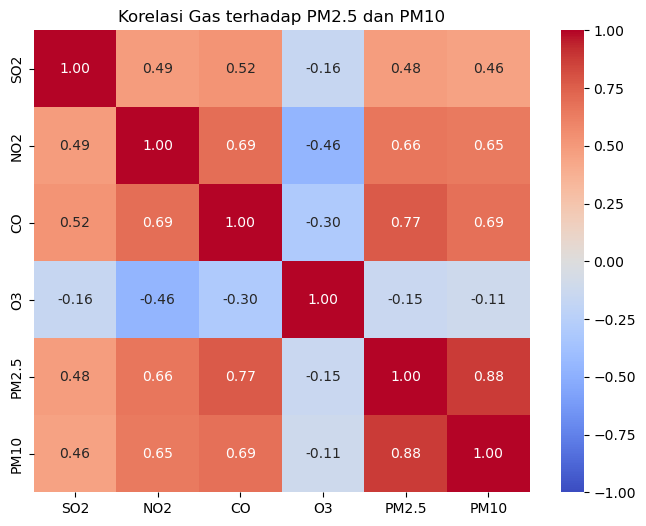

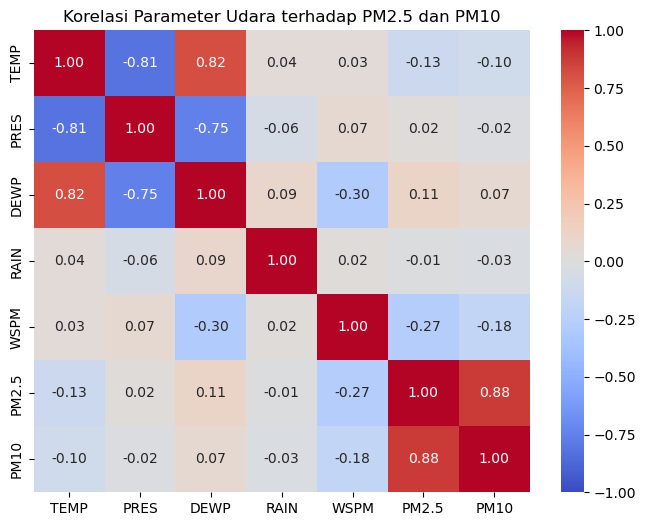

In [18]:
parameter_gas = ["SO2", "NO2", "CO", "O3", "PM2.5", "PM10"]
parameter_udara = ["TEMP", "PRES", "DEWP", "RAIN", "WSPM", "PM2.5", "PM10"]

korelasi_gas = data_gabungan[parameter_gas].corr()

korelasi_udara = data_gabungan[parameter_udara].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_gas, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Korelasi Gas terhadap PM2.5 dan PM10")
plt.savefig("heatmap_gas.png", dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(korelasi_udara, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Korelasi Parameter Udara terhadap PM2.5 dan PM10")
plt.savefig("heatmap_udara.png", dpi=300)
plt.show()

In [19]:
print("=" * 150)
print("""
Dari data di atas, dapat disimpulkan bahwa:

Gas yang paling berkorelasi dengan tingginya PM2.5 dan PM10 di stasiun di Beijing China adalah gas CO, dengan nilai korelasi 0.77 terhadap PM2.5 dan
0.69 terhadap PM10

Pada parameter udara di stasiun di Beijing China, ditemukan semua parameter berkorelasi lemah ataupun tidak berkorelasi dengan PM2.5 dan PM10
""")
print("=" * 150)


Dari data di atas, dapat disimpulkan bahwa:

Gas yang paling berkorelasi dengan tingginya PM2.5 dan PM10 di stasiun di Beijing China adalah gas CO, dengan nilai korelasi 0.77 terhadap PM2.5 dan
0.69 terhadap PM10

Pada parameter udara di stasiun di Beijing China, ditemukan semua parameter berkorelasi lemah ataupun tidak berkorelasi dengan PM2.5 dan PM10

